In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("marketing_data.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India


In [81]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [82]:
df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_24340\3355019470.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MntWines'])
C:\Users\hp\AppData\Local\Temp\ipykernel_24340\3355019470.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


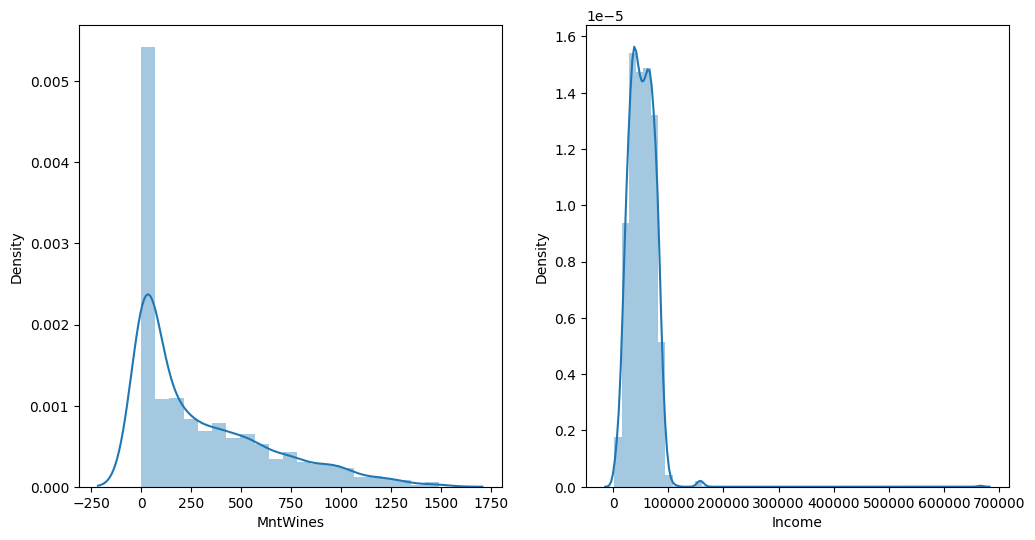

In [83]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['MntWines'])

plt.subplot(1,2,2)
sns.distplot(df['Income'])

plt.show()

I have found that there are outliers in the Income and MntWines column. Looking at the box plot of both columns, MntWines has a skewed distribution while Income has a Bi-modal distribution. I will apply IQR outlier removal technique on MntWines column and percentile outlier removal technique on Income column. In this notebook, I am keeping both "trimming" and "Capping" of outlier for  future references but for this data I will move forward with capping. 

# IQR Method of outlier detection and removal 

<Axes: ylabel='MntWines'>

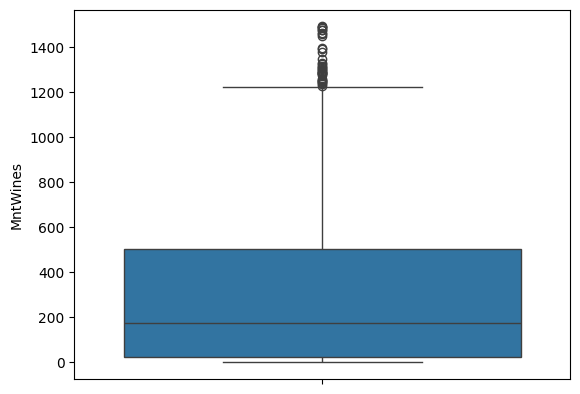

In [84]:
sns.boxplot(df['MntWines'])

I am calculating Inter-quantile range and maximum and minimun values, we can also get this by describe() though.

In [85]:
per25 = df['MntWines'].quantile(0.25)
per75 = df['MntWines'].quantile(0.75)
per25

23.75

In [86]:
per75

504.25

In [87]:
iqr = per75-per25
iqr

480.5

In [88]:
ul = per75+1.5*iqr
ul

1225.0

In [89]:
ll = per25-1.5*iqr
ll

-697.0

In [90]:
df['MntWines'].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

In [91]:
#Trimming 
# df[df['MntWines'] > ul]
# new_df = df[df['MntWines'] < ul]
# new_df.shape
# plt.figure(figsize = (12,6))
# plt.subplot(1,2,1)
# sns.distplot(new_df['MntWines'])

# plt.figure(figsize = (12,6))
# plt.subplot(1,2,1)
# sns.distplot(df['MntWines'])

# plt.show()
#sns.boxplot(new_df['MntWines'])

I am capping the values using IQR. 

In [93]:
neww_df = df.copy()
neww_df['MntWines'] = np.where(
    neww_df['MntWines']>ul,
    ul,
    np.where(
        neww_df['MntWines']<ll,
        ll,
        neww_df['MntWines']
    )
)

In [94]:
neww_df.shape

(2240, 28)

C:\Users\hp\AppData\Local\Temp\ipykernel_24340\816804928.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neww_df['MntWines'])
C:\Users\hp\AppData\Local\Temp\ipykernel_24340\816804928.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MntWines'])


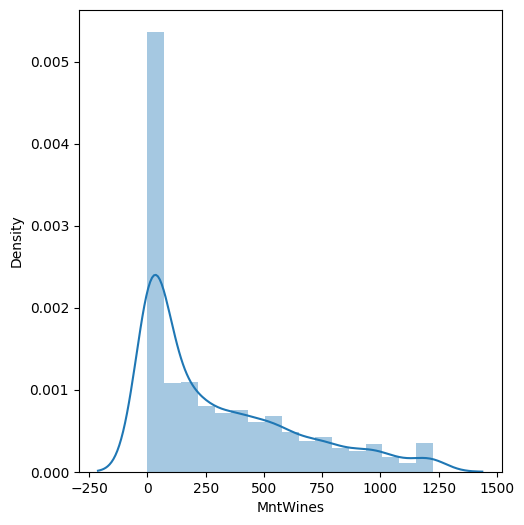

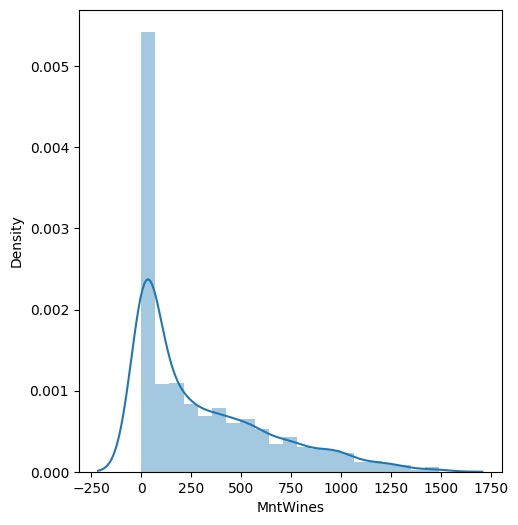

In [95]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(neww_df['MntWines'])

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['MntWines'])

plt.show()

We can see that after capping, the distribution at the tail is slightly upwards towards the end beacuse it accumulates values near maximum value.

<Axes: ylabel='MntWines'>

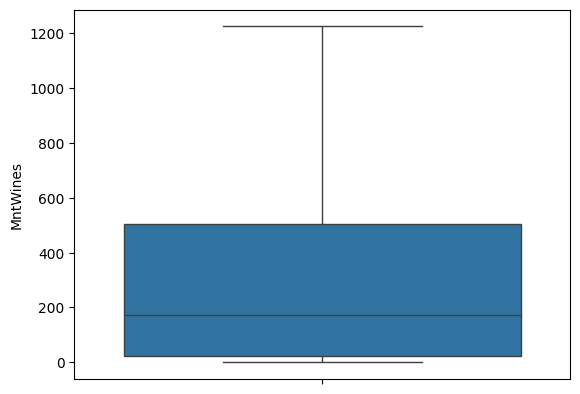

In [96]:
sns.boxplot(neww_df['MntWines'])

# Percentile Method of outlier detection and removal

C:\Users\hp\AppData\Local\Temp\ipykernel_24340\1875974925.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neww_df['Income'])


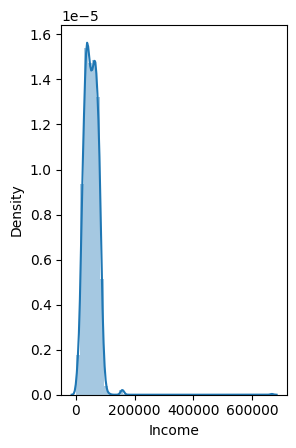

In [108]:
plt.subplot(1,2,2)
sns.distplot(neww_df['Income'])

plt.show()

<Axes: ylabel='Income'>

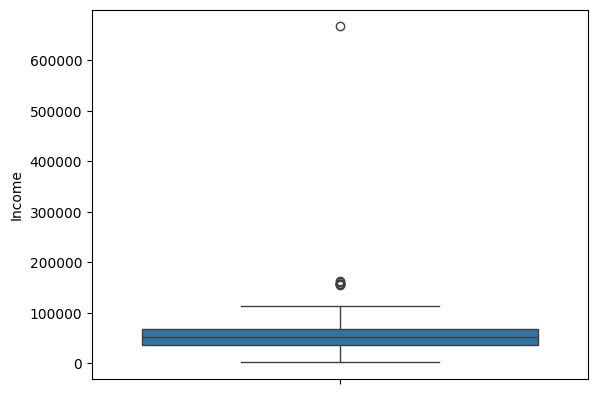

In [109]:
sns.boxplot(neww_df['Income'])

In [117]:
ul_p = neww_df['Income'].quantile(0.99)
ul_p

94458.79999999999

In [118]:
ll_p = neww_df['Income'].quantile(0.01)
ll_p

7579.200000000001

In [119]:
#Trimming 
# newww_df = df[(df['Income'] <= 94458.79) & (df['Income'] >= 7579.20 )]
# newww_df

In [120]:
#Winsarization
newww_df = neww_df.copy()
newww_df['Income'] = np.where(
    newww_df['Income']>ul_p,
    ul_p,
    np.where(
        newww_df['Income']<ll_p,
        ll_p,
        newww_df['Income']
    )
)

In [121]:
newww_df.shape

(2240, 28)

In [124]:
newww_df['Income'].describe()

count     2216.000000
mean     51770.277076
std      20728.704775
min       7579.200000
25%      35303.000000
50%      51381.500000
75%      68522.000000
max      94458.800000
Name: Income, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_24340\3761814808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newww_df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

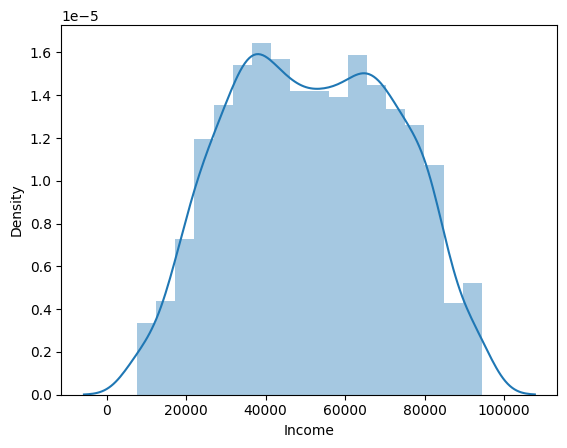

In [125]:
sns.distplot(newww_df['Income'])

<Axes: ylabel='Income'>

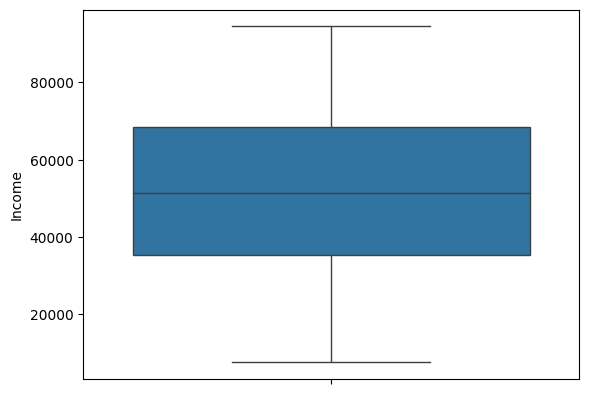

In [123]:
sns.boxplot(newww_df['Income'])

## Model Fitting Part

In [126]:
ne_df = newww_df.dropna()

In [128]:
ne_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [130]:
new_df = ne_df.drop(columns = ['ID', 'Year_Birth','Dt_Customer'])
new_df.head()
print(new_df.columns)

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country'],
      dtype='object')


In [131]:
X = new_df.drop(columns = ['Response'])
y = new_df['Response']

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [133]:
X_test.shape

(444, 24)

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [135]:
transformer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']]), ['Education']),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ['Marital_Status', 'Country']),
        ('scaler', StandardScaler(), ['Income'])
    ],
    remainder='passthrough' 
)


In [136]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [137]:
X_train = pd.DataFrame(X_train_transformed)
X_test = pd.DataFrame(X_test_transformed)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [140]:
y_pred = model.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8918918918918919

In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [143]:
pca.explained_variance_.shape

(36,)

Since components = None, we get as many PCs as many columns. We have increased the number of columns because I applied OHE to the Marital Status and Country Column. So we got a binary column for each category of both columns.

In [144]:
pca.explained_variance_ratio_

array([1.86716349e-01, 5.45943209e-02, 4.86638837e-02, 4.43183164e-02,
       4.12509207e-02, 3.76455736e-02, 3.41079405e-02, 3.32161262e-02,
       3.25178935e-02, 3.10811584e-02, 3.01156972e-02, 2.97438308e-02,
       2.94081084e-02, 2.88856238e-02, 2.76534755e-02, 2.71915189e-02,
       2.63646352e-02, 2.54975848e-02, 2.52549168e-02, 2.39985096e-02,
       2.17998605e-02, 2.07200029e-02, 1.88322586e-02, 1.69275279e-02,
       1.62338797e-02, 1.52265351e-02, 1.26501012e-02, 1.14549099e-02,
       1.09236548e-02, 1.01905841e-02, 8.81319298e-03, 6.07544678e-03,
       5.52285385e-03, 3.77158081e-03, 2.58978833e-03, 4.14385785e-05])

Here this code explain how much variance is explained by each PC. To get the optimum number of PCs we apply cumulative sum and try to find out the maximum varaince that can be explained by less PCs

In [145]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18671635, 0.24131067, 0.28997455, 0.33429287, 0.37554379,
       0.41318936, 0.44729731, 0.48051343, 0.51303132, 0.54411248,
       0.57422818, 0.60397201, 0.63338012, 0.66226574, 0.68991922,
       0.71711074, 0.74347537, 0.76897296, 0.79422787, 0.81822638,
       0.84002624, 0.86074625, 0.87957851, 0.89650603, 0.91273991,
       0.92796645, 0.94061655, 0.95207146, 0.96299511, 0.9731857 ,
       0.98199889, 0.98807434, 0.99359719, 0.99736877, 0.99995856,
       1.        ])

Since here no. of PCs is 36, we can manually see when we are getting the PCs that explain most variance. But when we have a lot of columns we may plot a visualization to get that number. 

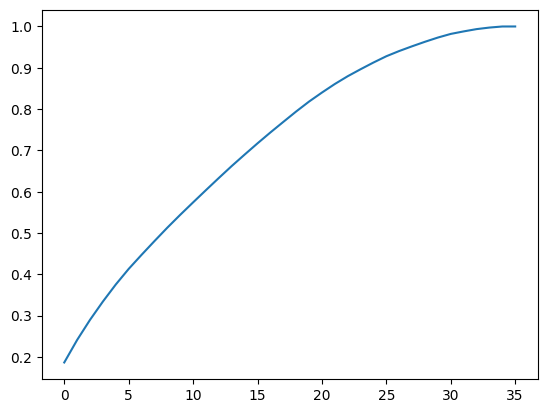

In [146]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

So I can see that 25 components explain about 90% of varaince of the data. And That I guess is enough. So I will go forward with 25 PCs. 

In [147]:
pca = PCA(n_components=25)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [148]:
model.fit(X_train_trf,y_train)

LogisticRegression()

In [150]:
y_pred = model.predict(X_test_trf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after PCA: {accuracy}")


Accuracy after PCA: 0.8828828828828829


We get 88% accuracy with 25 number of PCs.

We can see there is not any significant change in the accuracy of the model after outlier removal. However, removing any outliers from the data and treating them appropriately is always a good practice.